In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def run_episode(env, parameters):
    '''
    Episode running and returns total reward gained.
    +1 reward if pole is vertical.
    '''
    observation = env.reset()
    totalreward = 0
    for i in range(200):
        # determine the action to take
        # left if < 0
        # else right
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
            
    # env.close()

    return {'total_reward': totalreward, 
           'i_to_solve': i}

## Random Search Approach

In [3]:
bestparams = None
bestreward = 0
iter_solved = []

# cartPole env
env = gym.make('CartPole-v0')

for i in range(10000):
    
    # open viewer
    env.render()
    
    # generate random 4 parameter values [-1, 1]
    parameters = np.random.rand(4) * 2 - 1
    
    # run an episode
    episode = run_episode(env, parameters)
    
    # save episode variables
    reward = episode['total_reward']
    i_to_solve = episode['i_to_solve']
    
    # check how long it took to solve
    if i_to_solve <= 20:
        iter_solved.append(i_to_solve)
    
    # check best params and rewards
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
#         # consider solved if the agent lasts 200 timesteps
#         if reward == 200:
#             break

# close window
env.close()

print(bestparams)
print("Best reward: {}".format(bestreward))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[-0.38351004  0.70632117  0.37693858  0.94593196]
Best reward: 200.0


Text(0,0.5,'Frequency')

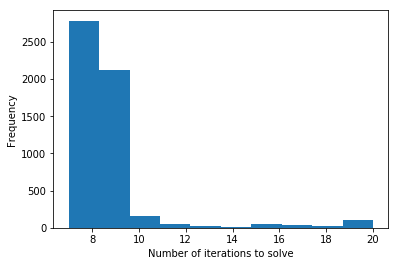

In [4]:
bins = min(10, len(iter_solved))
plt.hist(iter_solved, bins=bins)
plt.xlabel('Number of iterations to solve')
plt.ylabel('Frequency')

## Hill-climbing

In [9]:
noise_scaling = 0.1
parameters = None

bestparams = None
bestreward = 0
iter_solved = []

# cartPole env
env = gym.make('CartPole-v0')

for i in range(10000):
    
    # open viewer
    env.render()
    
    
    if parameters is None:
        # generate random 4 parameter values [-1, 1]
        parameters = np.random.rand(4) * 2 - 1
    else:
        # add random noise
        parameters = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
    
    # run an episode
    episode = run_episode(env, parameters)
    
    # save episode variables
    reward = episode['total_reward']
    i_to_solve = episode['i_to_solve']
    
    # check how long it took to solve
    if i_to_solve <= 20:
        iter_solved.append(i_to_solve)
    
    # check best params and rewards
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
#         # consider solved if the agent lasts 200 timesteps
#         if reward == 200:
#             break

# close window
env.close()

print(bestparams)
print("Best reward: {}".format(bestreward))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[ 4.42419291 -4.58194308 -5.53238006  1.77068509]
Best reward: 167.0


Text(0,0.5,'Frequency')

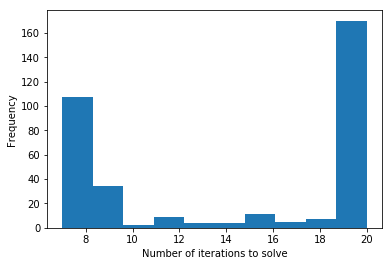

In [10]:
bins = min(10, len(iter_solved))
plt.hist(iter_solved, bins=bins)
plt.xlabel('Number of iterations to solve')
plt.ylabel('Frequency')

## Hill Climb with multiple episodes per update

In [4]:
noise_scaling = 0.1
parameters = None

bestparams = None
bestreward = 0
iter_solved = []

# cartPole env
env = gym.make('CartPole-v0')

for i in range(10000):
    
    # open viewer
    env.render()
    
    
    if parameters is None:
        # generate random 4 parameter values [-1, 1]
        parameters = np.random.rand(4) * 2 - 1
    else:
        # add random noise
        parameters = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
    
    reward = 0
    i_to_solve = 0
    
    # run an episode
    for j in range(10):
        episode = run_episode(env, parameters)
        
        # save episode variables
        episode_reward = episode['total_reward']
        episode_i_to_solve = episode['i_to_solve']
        
        reward += episode_reward
        i_to_solve += episode_i_to_solve
    
    # check how long it took to solve
    if i_to_solve <= 2000:
        iter_solved.append(i_to_solve)
    
    # check best params and rewards
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
#         # consider solved if the agent lasts 200 timesteps
#         if reward == 200:
#             break

# close window
env.close()

print(bestparams)
print("Best reward: {}".format(bestreward))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[0.05148482 0.59018746 1.67302856 0.49163154]
Best reward: 2000.0


Text(0,0.5,'Frequency')

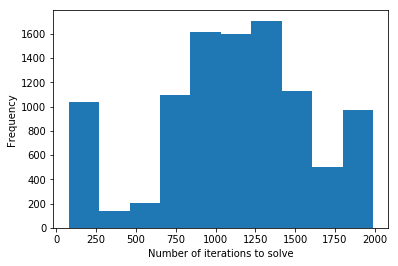

In [5]:
bins = min(10, len(iter_solved))
plt.hist(iter_solved, bins=bins)
plt.xlabel('Number of iterations to solve')
plt.ylabel('Frequency')